In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Concatenate, Reshape, Embedding, GlobalAveragePooling1D

In [2]:
data1 = pd.read_csv("input/features.csv")
data1

,ID,Label,Sequence,hydrophobicity_polar_first,hydrophobicity_polar_20%,hydrophobicity_polar_40%,hydrophobicity_polar_60%,hydrophobicity_polar_80%,hydrophobicity_polar_100%,hydrophobicity_neutral_first,...,solvent_accessibility_intermediate_40%,solvent_accessibility_intermediate_60%,solvent_accessibility_intermediate_80%,solvent_accessibility_intermediate_100%,solvent_accessibility_exposed_first,solvent_accessibility_exposed_20%,solvent_accessibility_exposed_40%,solvent_accessibility_exposed_60%,solvent_accessibility_exposed_80%,solvent_accessibility_exposed_100%
0,WP_395757889.1,AMP,MPYDSVYLEKRPPGALRTVWRKFYGDTTAMIGLYGCAGLLLLCVFG...,0.013514,0.189189,0.304054,0.631757,0.804054,1.000000,0.006757,...,0.371622,0.540541,0.736486,0.932432,0.013514,0.189189,0.304054,0.631757,0.804054,1.000000
1,WP_395755974.1,AMP,MKILIVEDDTLIQQGLAQAMARENYAYDCADSAVGASALLQSSHYS...,0.009091,0.254545,0.440909,0.636364,0.831818,0.990909,0.045455,...,0.377273,0.645455,0.845455,1.000000,0.009091,0.254545,0.440909,0.636364,0.831818,0.990909
2,WP_395732316.1,AMP,MDFSRKPTQDPEAWLDFAPEFSQSMARQVRGWIQRWEPDLAESIKW...,0.009852,0.182266,0.418719,0.605911,0.862069,0.995074,0.019704,...,0.399015,0.630542,0.783251,0.950739,0.009852,0.182266,0.418719,0.605911,0.862069,0.995074
3,WP_395723680.1,AMP,MDCSRTPTRDPETWLDLAPEFSQAMARQVRAWIQRWEPDLTESIKW...,0.009852,0.192118,0.477833,0.655172,0.866995,0.995074,0.019704,...,0.325123,0.497537,0.689655,0.921182,0.009852,0.192118,0.477833,0.655172,0.866995,0.995074
4,WP_395695240.1,AMP,MADRDTAGVTFETTVSSFGNNTGIEVPEEVIERLGRGKRPPVLVTV...,0.019231,0.205128,0.455128,0.717949,0.891026,1.000000,0.012821,...,0.346154,0.532051,0.762821,0.884615,0.019231,0.205128,0.455128,0.717949,0.891026,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,XJO18458.1,nAMP,MDAEQINQIGATLADLSVRTVDLRRYLDYDAKAERLRTVNASLEDP...,0.005450,0.168937,0.362398,0.626703,0.831063,0.994550,0.008174,...,0.468665,0.613079,0.771117,0.986376,0.005450,0.168937,0.362398,0.626703,0.831063,0.994550
5996,XJO18049.1,nAMP,MKPFLRHQLERYAARLGELDFLLSREDIMGDMAQYRTISREHAEVT...,0.005525,0.196133,0.386740,0.602210,0.787293,0.986188,0.008287,...,0.439227,0.624309,0.828729,1.000000,0.005525,0.196133,0.386740,0.602210,0.787293,0.986188
5997,XJO18048.1,nAMP,MSTEPLAPSTVTQALAAAARLGVDRLDAQLLLLHALGRPPHDRAWL...,0.014134,0.240283,0.424028,0.597173,0.851590,1.000000,0.007067,...,0.328622,0.590106,0.731449,0.992933,0.014134,0.240283,0.424028,0.597173,0.851590,1.000000
5998,XJO17639.1,nAMP,MSFASETRRRRTFAIISHPDAGKTTLTEKLLLFSGAIQIAGSVKAR...,0.011070,0.219557,0.385609,0.583026,0.793358,0.994465,0.003690,...,0.365314,0.544280,0.745387,0.996310,0.011070,0.219557,0.385609,0.583026,0.793358,0.994465


In [3]:
data2 = pd.read_csv("input/features5.csv")
data2

,ID,Label,Sequence,hydrophobicity_polar_first,hydrophobicity_polar_20%,hydrophobicity_polar_40%,hydrophobicity_polar_60%,hydrophobicity_polar_80%,hydrophobicity_polar_100%,hydrophobicity_neutral_first,...,solvent_accessibility_intermediate_40%,solvent_accessibility_intermediate_60%,solvent_accessibility_intermediate_80%,solvent_accessibility_intermediate_100%,solvent_accessibility_exposed_first,solvent_accessibility_exposed_20%,solvent_accessibility_exposed_40%,solvent_accessibility_exposed_60%,solvent_accessibility_exposed_80%,solvent_accessibility_exposed_100%
0,WP_409105204.1,AMP,FFNAFPPSTKKSIYEWINNAKTPGTRQKRILETVEKAAENIRANQY...,0.058824,0.352941,0.549020,0.705882,0.882353,1.000000,0.078431,...,0.235294,0.450980,0.647059,0.960784,0.058824,0.352941,0.549020,0.705882,0.882353,1.000000
1,WP_409068528.1,AMP,MINLFRCIKSDFYKLKRTPILYLHVFIPLIGAFVFLLYYSFGSKGN...,0.012146,0.194332,0.336032,0.570850,0.838057,1.000000,0.040486,...,0.356275,0.587045,0.797571,0.995951,0.012146,0.194332,0.336032,0.570850,0.838057,1.000000
2,WP_409068239.1,AMP,MTVLLRYMWADVLKMKRTPLIWMHVAAPVLCAGFFLLFLYMYGRIQ...,0.023256,0.193798,0.484496,0.779070,0.879845,1.000000,0.007752,...,0.333333,0.531008,0.755814,0.996124,0.023256,0.193798,0.484496,0.779070,0.879845,1.000000
3,WP_408986247.1,AMP,MTQIARISDTGNERRLQAERLIGAEALQQAQALRFNVFSGEFNAKL...,0.011952,0.143426,0.330677,0.629482,0.820717,0.988048,0.007968,...,0.438247,0.617530,0.772908,0.980080,0.011952,0.143426,0.330677,0.629482,0.820717,0.988048
4,WP_290964488.1,AMP,MKPITFKSHIDYLPKLKLTHITVPSEIVDKAGGIGTRLMVSINGEK...,0.011905,0.351190,0.505952,0.654762,0.827381,1.000000,0.017857,...,0.309524,0.565476,0.767857,0.988095,0.011905,0.351190,0.505952,0.654762,0.827381,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,WP_399572425.1,nAMP,MTSPRPVIVLTALDDLTADHVITELHGRDIPVVRLDPGQPGDVTFS...,0.015625,0.253125,0.443750,0.603125,0.775000,0.987500,0.006250,...,0.328125,0.506250,0.750000,0.996875,0.015625,0.253125,0.443750,0.603125,0.775000,0.987500
99996,WP_399572123.1,nAMP,MNLLLAEVAQATQRLADAGVPSPRFDAEELAAFVHGVKRGELHNVK...,0.007117,0.181495,0.377224,0.622776,0.811388,0.989324,0.021352,...,0.476868,0.665480,0.825623,1.000000,0.007117,0.181495,0.377224,0.622776,0.811388,0.989324
99997,WP_399572121.1,nAMP,MFEAVEELIGEHADLEKRLADPAVHADQANARKLNKRYAELTPIVG...,0.008357,0.189415,0.373259,0.607242,0.810585,0.986072,0.011142,...,0.448468,0.637883,0.735376,0.977716,0.008357,0.189415,0.373259,0.607242,0.810585,0.986072
99998,WP_399571946.1,nAMP,MTIPVTGERRAAGLSWRGQVGARLATGVALLLTKRLSPRRLRQVLR...,0.055556,0.270833,0.402778,0.659722,0.875000,0.986111,0.013889,...,0.388889,0.638889,0.770833,1.000000,0.055556,0.270833,0.402778,0.659722,0.875000,0.986111


In [4]:
data = pd.concat([data1, data2], ignore_index=True)
data

,ID,Label,Sequence,hydrophobicity_polar_first,hydrophobicity_polar_20%,hydrophobicity_polar_40%,hydrophobicity_polar_60%,hydrophobicity_polar_80%,hydrophobicity_polar_100%,hydrophobicity_neutral_first,...,solvent_accessibility_intermediate_40%,solvent_accessibility_intermediate_60%,solvent_accessibility_intermediate_80%,solvent_accessibility_intermediate_100%,solvent_accessibility_exposed_first,solvent_accessibility_exposed_20%,solvent_accessibility_exposed_40%,solvent_accessibility_exposed_60%,solvent_accessibility_exposed_80%,solvent_accessibility_exposed_100%
0,WP_395757889.1,AMP,MPYDSVYLEKRPPGALRTVWRKFYGDTTAMIGLYGCAGLLLLCVFG...,0.013514,0.189189,0.304054,0.631757,0.804054,1.000000,0.006757,...,0.371622,0.540541,0.736486,0.932432,0.013514,0.189189,0.304054,0.631757,0.804054,1.000000
1,WP_395755974.1,AMP,MKILIVEDDTLIQQGLAQAMARENYAYDCADSAVGASALLQSSHYS...,0.009091,0.254545,0.440909,0.636364,0.831818,0.990909,0.045455,...,0.377273,0.645455,0.845455,1.000000,0.009091,0.254545,0.440909,0.636364,0.831818,0.990909
2,WP_395732316.1,AMP,MDFSRKPTQDPEAWLDFAPEFSQSMARQVRGWIQRWEPDLAESIKW...,0.009852,0.182266,0.418719,0.605911,0.862069,0.995074,0.019704,...,0.399015,0.630542,0.783251,0.950739,0.009852,0.182266,0.418719,0.605911,0.862069,0.995074
3,WP_395723680.1,AMP,MDCSRTPTRDPETWLDLAPEFSQAMARQVRAWIQRWEPDLTESIKW...,0.009852,0.192118,0.477833,0.655172,0.866995,0.995074,0.019704,...,0.325123,0.497537,0.689655,0.921182,0.009852,0.192118,0.477833,0.655172,0.866995,0.995074
4,WP_395695240.1,AMP,MADRDTAGVTFETTVSSFGNNTGIEVPEEVIERLGRGKRPPVLVTV...,0.019231,0.205128,0.455128,0.717949,0.891026,1.000000,0.012821,...,0.346154,0.532051,0.762821,0.884615,0.019231,0.205128,0.455128,0.717949,0.891026,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105995,WP_399572425.1,nAMP,MTSPRPVIVLTALDDLTADHVITELHGRDIPVVRLDPGQPGDVTFS...,0.015625,0.253125,0.443750,0.603125,0.775000,0.987500,0.006250,...,0.328125,0.506250,0.750000,0.996875,0.015625,0.253125,0.443750,0.603125,0.775000,0.987500
105996,WP_399572123.1,nAMP,MNLLLAEVAQATQRLADAGVPSPRFDAEELAAFVHGVKRGELHNVK...,0.007117,0.181495,0.377224,0.622776,0.811388,0.989324,0.021352,...,0.476868,0.665480,0.825623,1.000000,0.007117,0.181495,0.377224,0.622776,0.811388,0.989324
105997,WP_399572121.1,nAMP,MFEAVEELIGEHADLEKRLADPAVHADQANARKLNKRYAELTPIVG...,0.008357,0.189415,0.373259,0.607242,0.810585,0.986072,0.011142,...,0.448468,0.637883,0.735376,0.977716,0.008357,0.189415,0.373259,0.607242,0.810585,0.986072
105998,WP_399571946.1,nAMP,MTIPVTGERRAAGLSWRGQVGARLATGVALLLTKRLSPRRLRQVLR...,0.055556,0.270833,0.402778,0.659722,0.875000,0.986111,0.013889,...,0.388889,0.638889,0.770833,1.000000,0.055556,0.270833,0.402778,0.659722,0.875000,0.986111


In [5]:
data_test = pd.read_csv("input/features_test.csv")
data_test

,ID,Label,Sequence,hydrophobicity_polar_first,hydrophobicity_polar_20%,hydrophobicity_polar_40%,hydrophobicity_polar_60%,hydrophobicity_polar_80%,hydrophobicity_polar_100%,hydrophobicity_neutral_first,...,solvent_accessibility_intermediate_40%,solvent_accessibility_intermediate_60%,solvent_accessibility_intermediate_80%,solvent_accessibility_intermediate_100%,solvent_accessibility_exposed_first,solvent_accessibility_exposed_20%,solvent_accessibility_exposed_40%,solvent_accessibility_exposed_60%,solvent_accessibility_exposed_80%,solvent_accessibility_exposed_100%
0,WP_409105204.1,AMP,FFNAFPPSTKKSIYEWINNAKTPGTRQKRILETVEKAAENIRANQY...,0.058824,0.352941,0.549020,0.705882,0.882353,1.000000,0.078431,...,0.235294,0.450980,0.647059,0.960784,0.058824,0.352941,0.549020,0.705882,0.882353,1.000000
1,WP_409068528.1,AMP,MINLFRCIKSDFYKLKRTPILYLHVFIPLIGAFVFLLYYSFGSKGN...,0.012146,0.194332,0.336032,0.570850,0.838057,1.000000,0.040486,...,0.356275,0.587045,0.797571,0.995951,0.012146,0.194332,0.336032,0.570850,0.838057,1.000000
2,WP_409068239.1,AMP,MTVLLRYMWADVLKMKRTPLIWMHVAAPVLCAGFFLLFLYMYGRIQ...,0.023256,0.193798,0.484496,0.779070,0.879845,1.000000,0.007752,...,0.333333,0.531008,0.755814,0.996124,0.023256,0.193798,0.484496,0.779070,0.879845,1.000000
3,WP_408986247.1,AMP,MTQIARISDTGNERRLQAERLIGAEALQQAQALRFNVFSGEFNAKL...,0.011952,0.143426,0.330677,0.629482,0.820717,0.988048,0.007968,...,0.438247,0.617530,0.772908,0.980080,0.011952,0.143426,0.330677,0.629482,0.820717,0.988048
4,WP_290964488.1,AMP,MKPITFKSHIDYLPKLKLTHITVPSEIVDKAGGIGTRLMVSINGEK...,0.011905,0.351190,0.505952,0.654762,0.827381,1.000000,0.017857,...,0.309524,0.565476,0.767857,0.988095,0.011905,0.351190,0.505952,0.654762,0.827381,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,XLH51383.1,nAMP,MTKKEKDYKKSLEQQKTRVKLYKSGKSWVKASINEIELLKTMGLPF...,0.001181,0.120472,0.272441,0.517323,0.812598,1.000000,0.000787,...,0.485433,0.646063,0.807874,0.999606,0.001181,0.120472,0.272441,0.517323,0.812598,1.000000
19996,XLH51099.1,nAMP,MENIFNLFIKFFTTILEFIGTVAGDSVCASYFDEPEVPEELTKLYE,0.043478,0.130435,0.543478,0.739130,0.869565,1.000000,0.282609,...,0.565217,0.673913,0.826087,0.978261,0.043478,0.130435,0.543478,0.739130,0.869565,1.000000
19997,XLH51027.1,nAMP,MVNYKEKFAEAKTIAVNEGFESTRAEWLFLDVFGWSKTDYLIHKDE...,0.010791,0.194245,0.392086,0.597122,0.830935,0.978417,0.014388,...,0.359712,0.564748,0.741007,0.989209,0.010791,0.194245,0.392086,0.597122,0.830935,0.978417
19998,XLH51026.1,nAMP,MFDQLDIVEERYEQLNELLSDPDVVNDADKLRKYSKEQADLQKTVD...,0.008380,0.159218,0.321229,0.603352,0.810056,0.997207,0.033520,...,0.458101,0.634078,0.801676,0.969274,0.008380,0.159218,0.321229,0.603352,0.810056,0.997207


### Cột "ID" có thể chỉ là một định danh duy nhất cho từng dòng, không mang ý nghĩa đặc biệt trong mô hình.

In [7]:
data = data.drop(columns=['ID'])
data_test = data_test.drop(columns=['ID'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106000 entries, 0 to 105999
Columns: 128 entries, Label to solvent_accessibility_exposed_100%
dtypes: float64(126), object(2)
memory usage: 103.5+ MB


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 128 entries, Label to solvent_accessibility_exposed_100%
dtypes: float64(126), object(2)
memory usage: 19.5+ MB


### Kiểm tra và xóa số lượng rows trùng lặp

In [11]:
data.duplicated().sum()

34678

In [12]:
data_test.duplicated().sum()

4817

In [13]:
data = data.drop_duplicates()
data_test = data_test.drop_duplicates()

In [14]:
data.duplicated().sum()

0

In [15]:
data_test.duplicated().sum()

0

### Kiểm tra xem có cột nào chứa giá trị NaN (khuyết thiếu) hay không.

In [17]:
null_columns_1 = data.columns[data.isnull().sum() > 0]
print(data[null_columns_1].isnull().sum())

null_columns_2 = data_test.columns[data_test.isnull().sum() > 0]
print(data[null_columns_2].isnull().sum())

Series([], dtype: float64)
Series([], dtype: float64)


### Phân loại các cột theo kiểu dữ liệu
#### - float_columns: Chứa các cột có kiểu dữ liệu float64 (biến số học).
#### - object_columns: Chứa các cột có kiểu dữ liệu object (biến dạng chuỗi).

In [19]:
float_columns = data.select_dtypes(include=['float64']).columns
object_columns = data.select_dtypes(include=['object']).columns

### Dữ liệu có 2 cột dạng chuỗi:
#### - Label: Có thể là nhãn phân loại (ví dụ: Antimicrobial vs Non-Antimicrobial hoặc 1 vs 0).
#### - Sequence: Chuỗi peptide cần dự đoán.

In [21]:
object_columns

Index(['Label', 'Sequence'], dtype='object')

### Chuyển đổi nhãn (Label) từ chuỗi sang số (0/1):
#### - Nếu Label == 'nAMP' → gán 0 (Không kháng khuẩn).
#### - Nếu không phải 'nAMP' → gán 1 (Kháng khuẩn).
### Chuyển đổi kiểu dữ liệu thành float để phù hợp với mô hình.

In [23]:
data.loc[:, 'Label'] = data['Label'].apply(lambda x: 0 if x == 'nAMP' else 1)
data['Label'] = data['Label'].astype(float)

data_test.loc[:, 'Label'] = data_test['Label'].apply(lambda x: 0 if x == 'nAMP' else 1)
data_test['Label'] = data_test['Label'].astype(float)

data

,Label,Sequence,hydrophobicity_polar_first,hydrophobicity_polar_20%,hydrophobicity_polar_40%,hydrophobicity_polar_60%,hydrophobicity_polar_80%,hydrophobicity_polar_100%,hydrophobicity_neutral_first,hydrophobicity_neutral_20%,...,solvent_accessibility_intermediate_40%,solvent_accessibility_intermediate_60%,solvent_accessibility_intermediate_80%,solvent_accessibility_intermediate_100%,solvent_accessibility_exposed_first,solvent_accessibility_exposed_20%,solvent_accessibility_exposed_40%,solvent_accessibility_exposed_60%,solvent_accessibility_exposed_80%,solvent_accessibility_exposed_100%
0,1.0,MPYDSVYLEKRPPGALRTVWRKFYGDTTAMIGLYGCAGLLLLCVFG...,0.013514,0.189189,0.304054,0.631757,0.804054,1.000000,0.006757,0.202703,...,0.371622,0.540541,0.736486,0.932432,0.013514,0.189189,0.304054,0.631757,0.804054,1.000000
1,1.0,MKILIVEDDTLIQQGLAQAMARENYAYDCADSAVGASALLQSSHYS...,0.009091,0.254545,0.440909,0.636364,0.831818,0.990909,0.045455,0.190909,...,0.377273,0.645455,0.845455,1.000000,0.009091,0.254545,0.440909,0.636364,0.831818,0.990909
2,1.0,MDFSRKPTQDPEAWLDFAPEFSQSMARQVRGWIQRWEPDLAESIKW...,0.009852,0.182266,0.418719,0.605911,0.862069,0.995074,0.019704,0.256158,...,0.399015,0.630542,0.783251,0.950739,0.009852,0.182266,0.418719,0.605911,0.862069,0.995074
3,1.0,MDCSRTPTRDPETWLDLAPEFSQAMARQVRAWIQRWEPDLTESIKW...,0.009852,0.192118,0.477833,0.655172,0.866995,0.995074,0.019704,0.211823,...,0.325123,0.497537,0.689655,0.921182,0.009852,0.192118,0.477833,0.655172,0.866995,0.995074
4,1.0,MADRDTAGVTFETTVSSFGNNTGIEVPEEVIERLGRGKRPPVLVTV...,0.019231,0.205128,0.455128,0.717949,0.891026,1.000000,0.012821,0.224359,...,0.346154,0.532051,0.762821,0.884615,0.019231,0.205128,0.455128,0.717949,0.891026,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105995,0.0,MTSPRPVIVLTALDDLTADHVITELHGRDIPVVRLDPGQPGDVTFS...,0.015625,0.253125,0.443750,0.603125,0.775000,0.987500,0.006250,0.187500,...,0.328125,0.506250,0.750000,0.996875,0.015625,0.253125,0.443750,0.603125,0.775000,0.987500
105996,0.0,MNLLLAEVAQATQRLADAGVPSPRFDAEELAAFVHGVKRGELHNVK...,0.007117,0.181495,0.377224,0.622776,0.811388,0.989324,0.021352,0.224199,...,0.476868,0.665480,0.825623,1.000000,0.007117,0.181495,0.377224,0.622776,0.811388,0.989324
105997,0.0,MFEAVEELIGEHADLEKRLADPAVHADQANARKLNKRYAELTPIVG...,0.008357,0.189415,0.373259,0.607242,0.810585,0.986072,0.011142,0.200557,...,0.448468,0.637883,0.735376,0.977716,0.008357,0.189415,0.373259,0.607242,0.810585,0.986072
105998,0.0,MTIPVTGERRAAGLSWRGQVGARLATGVALLLTKRLSPRRLRQVLR...,0.055556,0.270833,0.402778,0.659722,0.875000,0.986111,0.013889,0.180556,...,0.388889,0.638889,0.770833,1.000000,0.055556,0.270833,0.402778,0.659722,0.875000,0.986111


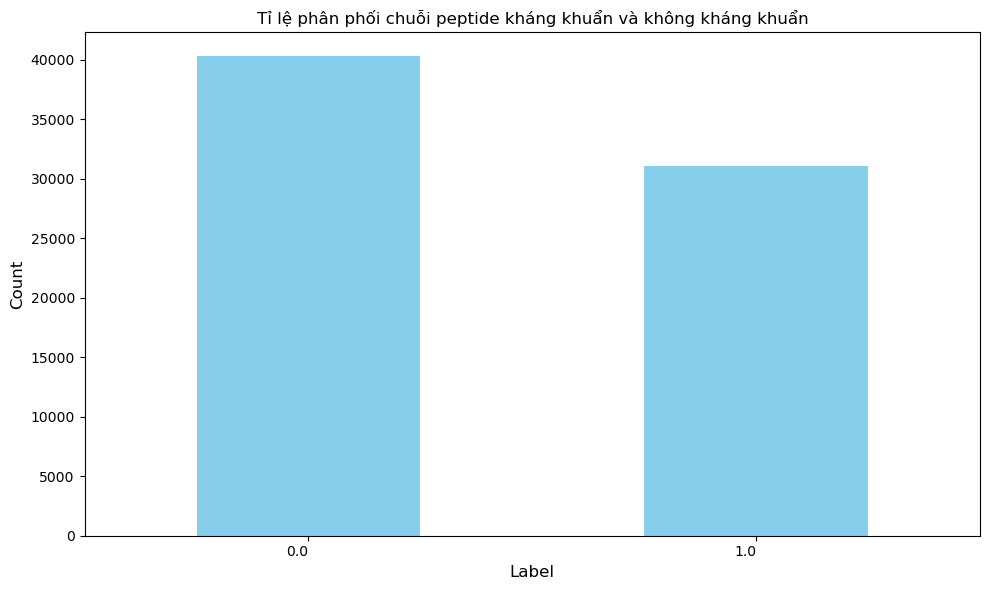

In [24]:
label_counts = data['Label'].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color = 'skyblue')
plt.title('Tỉ lệ phân phối chuỗi peptide kháng khuẩn và không kháng khuẩn')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [25]:
x_test = data_test.drop(columns=['Label'])
y_test = data_test['Label']

X_train = data.drop(columns=['Label'])
y_train = data['Label']

### Kiểm tra (mẫu, đặc trưng)

In [27]:
print(x_test.shape)
print(y_test.shape)

print(X_train.shape)
print(y_train.shape)

(15183, 127)
(15183,)
(71322, 127)
(71322,)


In [28]:
X_val, X_test, Y_val, Y_test = train_test_split(x_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

### chuỗi sequence dạng chữ, chuyển về chuỗi số

In [30]:
sequence_lengths = [len(seq) for seq in  data['Sequence']]  

# Tính giá trị percentile 95%
max_length = int(np.percentile(sequence_lengths, 95))  
print(f"Max length hợp lý dựa trên 95% dữ liệu: {max_length}")

Max length hợp lý dựa trên 95% dữ liệu: 1558


### Đệm hoặc cắt ở phía sau
###  Lý do chọn 'post':
#### - Giữ thông tin quan trọng ở đầu chuỗi, vì đầu peptide có thể chứa thông tin quan trọng về tính kháng khuẩn.

In [32]:
# pip install tensorflow

In [33]:


padding_type = 'post' # Đệm thêm số 0
trunc_type = 'post'  # Cắt nếu chuỗi dài

In [34]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(data['Sequence'])
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)

Vocab Size:  25


In [35]:
tokenizer.word_index

{'l': 1,
 'a': 2,
 'g': 3,
 'v': 4,
 'r': 5,
 'e': 6,
 'd': 7,
 's': 8,
 't': 9,
 'p': 10,
 'i': 11,
 'q': 12,
 'f': 13,
 'k': 14,
 'n': 15,
 'y': 16,
 'h': 17,
 'm': 18,
 'w': 19,
 'c': 20,
 'x': 21,
 'j': 22,
 'z': 23,
 'b': 24}

In [36]:
train_sequences  = tokenizer.texts_to_sequences(X_train['Sequence'])
train_sequence_array = pad_sequences(train_sequences , maxlen= max_length, padding= padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(X_val['Sequence'])
val_sequence_array = pad_sequences(val_sequences , maxlen= max_length, padding= padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test['Sequence'])
test_sequence_array = pad_sequences(test_sequences , maxlen= max_length, padding= padding_type, truncating=trunc_type)

In [37]:
X_train= X_train.drop(columns=['Sequence'])
X_train['train_sequences'] = train_sequence_array.tolist()

X_val= X_val.drop(columns=['Sequence'])
X_val['val_sequences'] = val_sequence_array.tolist()

X_test= X_test.drop(columns=['Sequence'])
X_test['test_sequences'] = test_sequence_array.tolist()

In [38]:
X_train.describe()

,hydrophobicity_polar_first,hydrophobicity_polar_20%,hydrophobicity_polar_40%,hydrophobicity_polar_60%,hydrophobicity_polar_80%,hydrophobicity_polar_100%,hydrophobicity_neutral_first,hydrophobicity_neutral_20%,hydrophobicity_neutral_40%,hydrophobicity_neutral_60%,...,solvent_accessibility_intermediate_40%,solvent_accessibility_intermediate_60%,solvent_accessibility_intermediate_80%,solvent_accessibility_intermediate_100%,solvent_accessibility_exposed_first,solvent_accessibility_exposed_20%,solvent_accessibility_exposed_40%,solvent_accessibility_exposed_60%,solvent_accessibility_exposed_80%,solvent_accessibility_exposed_100%
count,71322.000000,71322.000000,71322.000000,71322.000000,71322.000000,71322.000000,71322.000000,71322.000000,71322.000000,71322.000000,...,71322.000000,71322.000000,71322.000000,71322.000000,71322.000000,71322.000000,71322.000000,71322.000000,71322.000000,71322.000000
mean,0.026891,0.221169,0.416477,0.615849,0.809670,0.983047,0.024930,0.214516,0.408735,0.603134,...,0.392684,0.590453,0.786416,0.973868,0.026891,0.221169,0.416477,0.615849,0.809670,0.983047
std,0.060722,0.068780,0.075150,0.073767,0.069169,0.069061,0.053660,0.055168,0.060750,0.059699,...,0.078519,0.082321,0.076887,0.075947,0.060722,0.068780,0.075150,0.073767,0.069169,0.069061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005660,0.184971,0.380435,0.588228,0.791946,0.989967,0.005495,0.186170,0.378486,0.578212,...,0.353919,0.557508,0.763571,0.979021,0.005660,0.184971,0.380435,0.588228,0.791946,0.989967
50%,0.011628,0.208568,0.411765,0.616279,0.813953,0.998110,0.010363,0.204544,0.404255,0.601562,...,0.394338,0.596062,0.794643,0.993671,0.011628,0.208568,0.411765,0.616279,0.813953,0.998110
75%,0.023669,0.243243,0.450777,0.647959,0.838494,1.000000,0.021739,0.231003,0.432203,0.625000,...,0.431250,0.631016,0.819853,0.999423,0.023669,0.243243,0.450777,0.647959,0.838494,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
columns_with_max_equal_1 = X_train.columns[X_train.max() == 1]
columns_with_min_equal_0 = X_train.columns[X_train.min() == 0]

# In kết quả
print("Các cột có max == 1:", len(list(columns_with_max_equal_1)))
print("Các cột có min == 0:", len(list(columns_with_min_equal_0)))

Các cột có max == 1: 126
Các cột có min == 0: 126


## Kiểm tra X_train
#### Tổng có 127 cột. Tách thành 126 + 1 cột mảng

In [41]:
print(X_train.dtypes.value_counts())

float64    126
object       1
Name: count, dtype: int64


In [42]:
X_train_num = X_train.iloc[:, :126]  # Chọn 126 cột đầu tiên
X_train_text = X_train.iloc[:, -1]   # Chọn cột cuối cùng

In [43]:
# object_cols = X_train.select_dtypes(include=['object']).columns
# print("Cột object:", object_cols)

In [44]:
print(X_train_text.head(10))  # Xem 10 dòng đầu

0    [18, 10, 16, 7, 8, 4, 16, 1, 6, 14, 5, 10, 10,...
1    [18, 14, 11, 1, 11, 4, 6, 7, 7, 9, 1, 11, 12, ...
2    [18, 7, 13, 8, 5, 14, 10, 9, 12, 7, 10, 6, 2, ...
3    [18, 7, 20, 8, 5, 9, 10, 9, 5, 7, 10, 6, 9, 19...
4    [18, 2, 7, 5, 7, 9, 2, 3, 4, 9, 13, 6, 9, 9, 4...
5    [18, 5, 1, 4, 1, 8, 8, 1, 13, 2, 1, 3, 1, 13, ...
6    [18, 9, 4, 10, 8, 2, 12, 2, 17, 10, 5, 9, 12, ...
7    [18, 3, 7, 1, 9, 11, 9, 9, 9, 1, 6, 10, 13, 3,...
8    [18, 9, 2, 7, 5, 12, 10, 4, 10, 3, 7, 1, 5, 2,...
9    [18, 14, 9, 7, 10, 5, 11, 7, 2, 16, 11, 7, 9, ...
Name: train_sequences, dtype: object


## Kiểm tra X_val
#### Tổng có 127 cột. Tách thành 126 + 1 cột mảng

In [46]:
print(X_val.dtypes.value_counts())

float64    126
object       1
Name: count, dtype: int64


In [47]:
X_val_num = X_val.iloc[:, :126]  # Chọn 126 cột đầu tiên
X_val_text = X_val.iloc[:, -1]   # Chọn cột cuối cùng

In [48]:
print(X_val_text.head(10))  # Xem 10 dòng đầu

7917     [18, 15, 12, 12, 2, 19, 9, 10, 5, 12, 11, 4, 9...
12836    [18, 8, 3, 2, 7, 2, 8, 10, 14, 9, 10, 7, 7, 2,...
14377    [18, 14, 14, 6, 14, 15, 11, 15, 7, 15, 11, 1, ...
16966    [18, 15, 8, 10, 17, 8, 1, 11, 10, 8, 1, 6, 15,...
19078    [18, 16, 9, 1, 2, 5, 7, 4, 8, 2, 4, 10, 9, 7, ...
4352     [18, 9, 9, 12, 2, 2, 6, 4, 2, 14, 5, 5, 9, 13,...
7634     [18, 7, 13, 1, 3, 2, 1, 8, 10, 4, 15, 11, 12, ...
18668    [18, 8, 9, 10, 10, 16, 9, 16, 13, 9, 12, 11, 3...
11506    [18, 8, 5, 13, 10, 1, 9, 11, 10, 12, 12, 3, 1,...
446      [18, 10, 16, 7, 15, 4, 16, 8, 6, 14, 5, 9, 10,...
Name: val_sequences, dtype: object


## Kiểm tra dữ liệu huấn luyện
In thử một vài giá trị trong X_train và X_val để kiểm tra xem có giá trị âm hoặc không hợp lệ không

In [50]:
print(f"X_train_text - NaN: {pd.isna(X_train_text).sum()} / Total: {X_train_text.size}")
print(f"X_val_text - NaN: {pd.isna(X_val_text).sum()} / Total: {X_val_text.size}")

X_train_text - NaN: 0 / Total: 71322
X_val_text - NaN: 0 / Total: 7591


In [51]:
X_train_num = np.array(X_train_num, dtype=np.float32)
X_val_num = np.array(X_val_num, dtype=np.float32)

In [52]:
# Định nghĩa độ dài cố định cho X_train_text và X_val_text
max_len = 1558  

# Chuyển đổi tất cả thành danh sách cùng kích thước
X_train_text = np.array([seq[:max_len] + [0] * (max_len - len(seq)) if len(seq) < max_len else seq[:max_len] for seq in X_train_text], dtype=np.int32)

X_val_text = np.array([seq[:max_len] + [0] * (max_len - len(seq)) if len(seq) < max_len else seq[:max_len] for seq in X_val_text], dtype=np.int32)

print("X_train_text shape:", X_train_text.shape)
print("X_val_text shape:", X_val_text.shape)

X_train_text shape: (71322, 1558)
X_val_text shape: (7591, 1558)


### Các class huấn luyện model
#### - Điều kiện quan trọng: embed_dim phải chia hết cho heads để mỗi đầu Attention có kích thước vector bằng nhau.
#### - Thông thường, số neurons trong FFN (neurons) nên gấp 2-4 lần embed_dim để mô hình có đủ khả năng trích xuất đặc trưng.
#### - Gợi ý công thức: neurons = 2 × embed_dim hoặc neurons = 4 × embed_dim.

In [54]:
# Định nghĩa Transformer Encoder
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim // heads) # NOTE
        self.ffn = tf.keras.Sequential([
            layers.Dense(neurons, activation="relu"),
            layers.Dense(embed_dim)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.5)
        self.dropout2 = layers.Dropout(0.5)

    def call(self, inputs, training=None, mask=None):
        attn_output = self.att(inputs, inputs, attention_mask=mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Lớp embedding cho chuỗi văn bản
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.maxlen = maxlen
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        positions = tf.range(start=0, limit=self.maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [55]:
# ==== THAM SỐ ====
embed_dim = 250   # Kích thước vector embedding
heads = 2         # Số đầu attention
neurons = 500     # Số nơ-ron của lớp fully connected
maxlen = 1558     # Chiều dài chuỗi đầu vào
num_features = 126  # Số lượng cột số đầu vào
vocab_size = 25   # Kích thước từ vựng

# ==== ĐỊNH NGHĨA INPUT ====
# Input cho dữ liệu số
num_input = Input(shape=(num_features,))
num_reshaped = Dense(embed_dim, activation="relu")(num_input)  # Chuyển sang embed_dim
num_reshaped = Reshape((1, embed_dim))(num_reshaped)  # Reshape thành dạng 3D (1, embed_dim)

# Input cho dữ liệu chuỗi
text_input = Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
text_embedded = embedding_layer(text_input)

# Ghép hai đầu vào
merged_input = Concatenate(axis=1)([num_reshaped, text_embedded])

# Transformer Encoder
transformer_block = TransformerEncoder(embed_dim=embed_dim, heads=heads, neurons=neurons)
x = transformer_block(merged_input)

# Global Average Pooling để giảm chiều dữ liệu
x = GlobalAveragePooling1D()(x)

# Fully connected layers
x = Dense(500, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(250, activation="relu")(x)
x = Dropout(0.1)(x)

# Output (ví dụ: classification với softmax, có thể thay đổi)
output = Dense(1, activation="sigmoid")(x)

In [56]:
# ==== TẠO MÔ HÌNH ====
model = Model(inputs=[num_input, text_input], outputs=output)

# Biên dịch mô hình
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Hiển thị mô hình
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 126)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 250)               │          31,750 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_1 (InputLayer)    │ (None, 1558)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape (Reshape)             │ (None, 1, 250)            │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_and_position_embedding  │ (None, 1558, 250)         │         395,750 │ input_layer_1[0][0]        │
│ (TokenAndPositionEmbedding)   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 1559, 250)         │               0 │ reshape[0][0],             │
│                               │                           │                 │ token_and_position_embedd… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ transformer_encoder           │ (None, 1559, 250)         │         502,750 │ concatenate[0][0]          │
│ (TransformerEncoder)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d      │ (None, 250)               │               0 │ transformer_encoder[0][0]  │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 500)               │         125,500 │ global_average_pooling1d[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 500)               │               0 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 250)               │         125,250 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_4 (Dropout)           │ (None, 250)               │               0 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 1)                 │             251 │ dropout_4[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,181,251 (4.51 MB)

 Trainable params: 1,181,251 (4.51 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.load_weights('transfomer_peptide_weights.best.weights.h5')

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 54 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import shap

In [ ]:
# Tách đặc trưng số và văn bản từ tập test
X_test_num = X_test.iloc[:, :126]  # 126 đặc trưng số
X_test_text = X_test.iloc[:, -1]   # 1 cột văn bản nhưng được padding lên 1558 chiều

# Chuyển đổi thành mảng numpy
X_test_num = np.array(X_test_num, dtype=np.float32)

# Định nghĩa độ dài cố định cho dữ liệu text (1558 chiều)
max_len = 1558  
X_test_text = np.array([seq[:max_len] + [0] * (max_len - len(seq)) if len(seq) < max_len else seq[:max_len] for seq in X_test_text], dtype=np.int32)

In [ ]:
# Tổng số đặc trưng: 126 số + 1558 text = 1684
num_features = X_test_num.shape[1]
text_features = X_test_text.shape[1]

# Kiểm tra số đặc trưng
print(f"Tổng số đặc trưng trong mẫu: {num_features + text_features}")  # Phải là 1684

# Xây dựng danh sách tên đặc trưng cho SHAP
feature_names = [f"num_feat_{i}" for i in range(num_features)]  # 126 cột số
text_feature_names = [f"text_feat_{i}" for i in range(text_features)]  # 1558 cột text
full_feature_names = feature_names + text_feature_names  # Tổng 1684 tên

# Chuẩn bị mẫu để giải thích SHAP
sample_num = X_test_num[10:12]
sample_text = X_test_text[10:12]
samples = np.concatenate([sample_num, sample_text], axis=1)

# Xây dựng hàm dự đoán để tương thích với SHAP
def predict_shap_wrapper(X):
    """
    Chuyển đổi dữ liệu SHAP thành đầu vào phù hợp cho mô hình Transformer
    """
    X_num = X[:, 0:num_features]
    X_text = X[:, num_features:(num_features + text_features)]
    return model.predict([X_num, X_text])

In [ ]:
# Chọn nền cho SHAP Explainer
X_train_combined = np.concatenate([X_train_num, X_train_text], axis=1)
background = shap.utils.sample(X_train_combined, 1)

# Tạo SHAP Explainer
try:
    explainer = shap.DeepExplainer(model, background)  # Nếu là mô hình deep learning
except:
    explainer = shap.KernelExplainer(predict_shap_wrapper, background)  # Backup nếu lỗi

In [60]:
# Tính giá trị SHAP
shap_values = explainer.shap_values(samples)

# Xây dựng danh sách SHAP Explanation
shap_explanations = [
    shap.Explanation(
        values=shap_values[i],  
        base_values=explainer.expected_value,  
        data=samples[i],  
        feature_names=full_feature_names  
    )
    for i in range(len(samples))
]

Tổng số đặc trưng trong mẫu: 1684


C:\Users\hp\anaconda3\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


  0%|          | 0/2 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 108s 971ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 164s 971ms/step


🔹 Waterfall Plot cho mẫu 1:


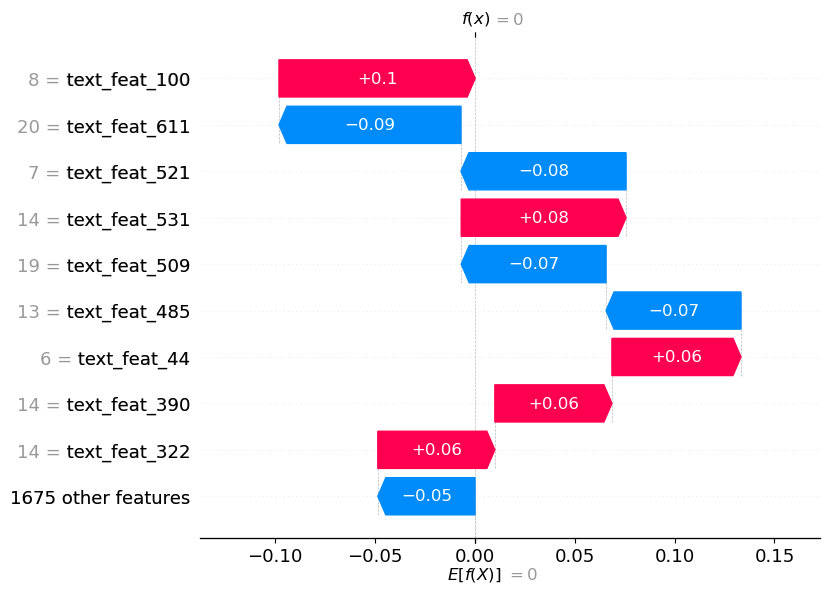

🔹 Waterfall Plot cho mẫu 2:


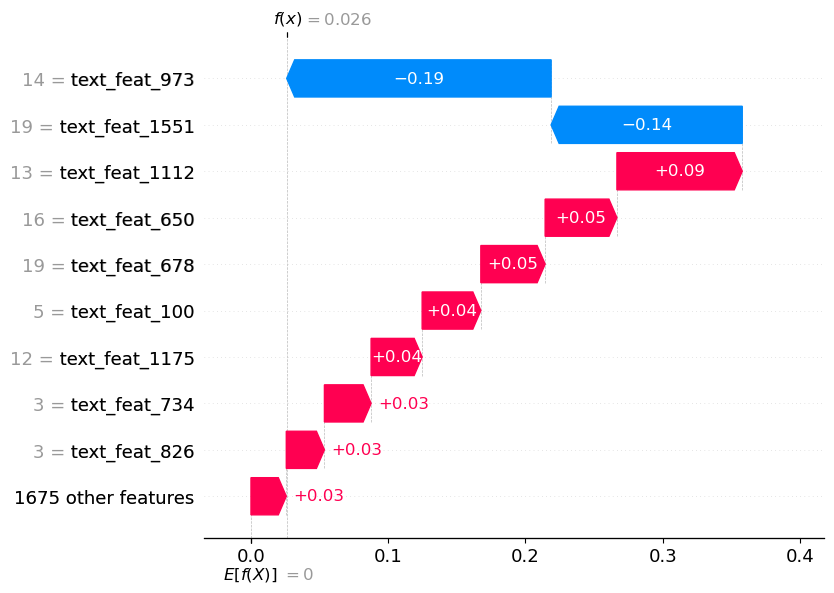

In [61]:
# Vẽ biểu đồ Waterfall Plot cho từng mẫu
for i, shap_exp in enumerate(shap_explanations):
    print(f"🔹 Waterfall Plot cho mẫu {i+1}:")
    
    # Chuyển ma trận (1684,1) thành vector (1684,)
    shap_exp.values = shap_exp.values.reshape(-1)
    
    shap.plots.waterfall(shap_exp)

### Xuất từng Waterfall Plot thành file HTML

🔹 Xuất Waterfall Plot cho mẫu 1...


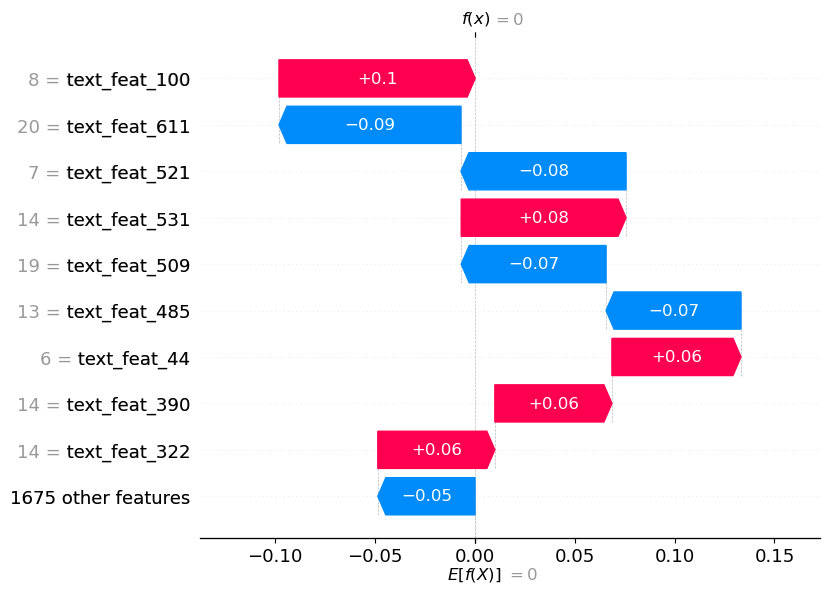

✅ Đã lưu: waterfall_plot_sample_1.html
🔹 Xuất Waterfall Plot cho mẫu 2...


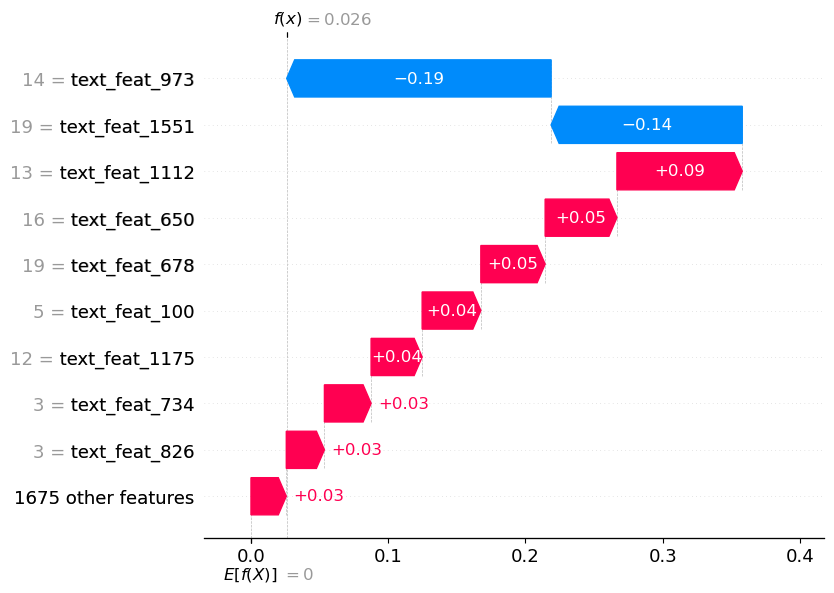

✅ Đã lưu: waterfall_plot_sample_2.html


In [77]:
import shap
import matplotlib.pyplot as plt

# Xuất từng mẫu thành file HTML riêng
for i, shap_exp in enumerate(shap_explanations):
    print(f"🔹 Xuất Waterfall Plot cho mẫu {i+1}...")

    # Chuyển ma trận (1684,1) thành vector (1684,)
    shap_exp.values = shap_exp.values.reshape(-1)

    # Vẽ biểu đồ
    plt.figure()
    shap.plots.waterfall(shap_exp, show=True)

    # Lưu ảnh dưới dạng PNG
    img_path = f"waterfall_plot_sample_{i+1}.png"
    plt.savefig(img_path, bbox_inches="tight")
    plt.close()

    # Xuất ra file HTML riêng với encoding UTF-8
    html_path = f"waterfall_plot_sample_{i+1}.html"
    with open(html_path, "w", encoding="utf-8") as f:
        f.write(f"<html><body><h2>Waterfall Plot - Mẫu {i+1}</h2>")
        f.write(f'<img src="{img_path}" width="800">')  # Hiển thị hình ảnh
        f.write("</body></html>")

    print(f"✅ Đã lưu: {html_path}")